In [ ]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


In [ ]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [ ]:
train_raw = pd.read_csv('drive/MyDrive/fmnist_train.csv', sep=",")
test_raw= pd.read_csv('drive/MyDrive/fmnist_test.csv', sep=',')

In [ ]:
train_raw.shape

(17040, 786)

In [ ]:
test_raw = test_raw.dropna(axis=0)

In [ ]:
train_raw = train_raw.dropna(axis=0)

In [ ]:
train_raw.shape

(17039, 786)

In [ ]:
train_raw.isna().sum().sum()

0

In [ ]:
train_raw.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,Id
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,220.0,214.0,74.0,0.0,255.0,222.0,128.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,12.0,0.0,0.0,40.0,134.0,162.0,191.0,214.0,163.0,146.0,165.0,79.0,0.0,0.0,0.0,30.0,43.0,0.0,0.0,0.0,0.0,0.0,2
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,249.0,207.0,197.0,202.0,45.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,22.0,21.0,25.0,69.0,52.0,45.0,74.0,39.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,237.0,229.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.0,116.0,112.0,136.0,147.0,144.0,121.0,102.0,63.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [ ]:
test_id = test_raw['Id'] # Выделил id из теста
x_test = test_raw.drop('Id', axis=1).values # Получаем матрицу для теста
x_test = x_test.reshape(-1, 28, 28)

In [ ]:
Y = train_raw['label'].values # вектор правильных ответов
X = train_raw.drop(['Id', 'label'], axis=1).values.reshape(-1,28,28)  # -1 Оставляем ту же размерность и решейпим 28 на 28 чтобы была возможность отобразить изображение

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.models as M
import tensorflow.keras.layers as L
import tensorflow.keras.backend as K
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
print(tf.__version__)
print(keras.__version__)
import pandas as pd

2.4.1
2.4.0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train , x_val , y_train , y_val = train_test_split(X,Y,test_size=0.3,random_state=42)

In [ ]:
print('Train shape: {}'.format(x_train.shape))
print('Val shape: {}'.format(x_val.shape))
print('Test shape: {}'.format(x_test.shape))

Train shape: (11927, 28, 28)
Val shape: (5112, 28, 28)
Test shape: (10000, 28, 28)


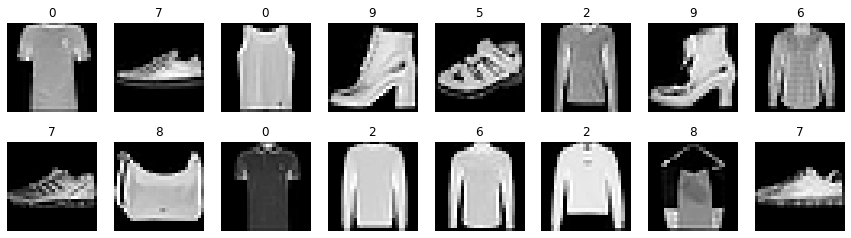

In [ ]:
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_train[random_index, :], cmap='gray')
        ax.set_title(y_train[random_index])
plt.show()


In [ ]:
x_train_std = x_train.astype('float64') / 255.0 - 0.5 #стандартизируем для облегчения обучения
x_val_std = x_val.astype('float64') / 255.0 - 0.5
x_test_std = x_test.astype('float64')/ 255.0 -0.5

In [ ]:
x_train_std.shape

(11927, 28, 28)

In [ ]:
x_test_std.shape

(10000, 28, 28)

In [ ]:
print(x_train_std.mean())
print(x_train_std.std())

-0.21567014329836898
0.3514110983033753


In [ ]:
#растягиваем матрицу изображения в вектор, так как посвязные слои умеют работать умеют работать только с векторам
x_train_flat = x_train_std.reshape(-1, 784)
x_val_flat = x_val_std.reshape(-1, 784)
x_test_flat = x_test_std.reshape(-1, 784)

In [ ]:
print('Flatten train shape: ', x_train_flat.shape)
print('Flatten val shape: ', x_val_flat.shape)
print('Flatten test shape: ', x_val_flat.shape)

Flatten train shape:  (11927, 784)
Flatten val shape:  (5112, 784)
Flatten test shape:  (5112, 784)


In [ ]:
y_train_ohe = keras.utils.to_categorical(y_train, 10)#10 - количество классов len(set(y_train))
y_val_ohe = keras.utils.to_categorical(y_val, 10)

In [ ]:
y_train_ohe.shape

(11927, 10)

In [ ]:
x_train2 = x_train_std[:,:,:,np.newaxis] # Для кераса требуеся дополнительный канал
x_val2 = x_val_std[:,:,:,np.newaxis]
x_test2 = x_test_std[:,:,:,np.newaxis]

In [ ]:
x_train2.shape

(11927, 28, 28, 1)

In [ ]:
x_val2.shape

(5112, 28, 28, 1)

In [ ]:
model = M.Sequential()#создаем модель, к которой будет добавлять слои
model.add(L.Input(shape=(28,28, 1)))#организуем входной слой размерностью равной размерности вектора признаков
model.add(L.Conv2D(filters=16, kernel_size=3, activation='relu', padding='same'))
model.add(L.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))
model.add(L.MaxPooling2D())
model.add(L.Dropout(0.4))
model.add(L.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(L.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same')) # Непосредственно свертка
model.add(L.MaxPooling2D()) # Удалим незначительные детали
model.add(L.Flatten()) # Вытянем в вектор
initializer = tf.keras.initializers.GlorotUniform() # Ициализатор весов
model.add(L.Dense(128, activation='tanh', kernel_initializer=initializer)) #Добавляем первый полносвязный слой
model.add(L.Dropout(0.5))#Слой отключение - добавляется для избежания переобучения
initializer = tf.keras.initializers.GlorotUniform()
model.add(L.Dense(64, activation='relu', kernel_initializer=initializer))#Добавляем второй полносвязный слой
model.add(L.Dropout(0.5))
model.add(L.Dense(10, activation='softmax')) # приводим слои к 10 выходам
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)        

In [ ]:
model.compile(
    #optimizer = 'Adam',#оптимизатор, комбинирующий два вида градиентного спуска(SGD, RMSProp, NAdam, Adamax, Adadelta)

    optimizer = tf.keras.optimizers.Adam(1e-4), #оптимизатор, комбинирующий два вида градиентного спуска(SGD, RMSProp, NAdam, Adamax, Adadelta)

    loss = 'categorical_crossentropy',#для регрессии: mse,mae,mape; для классификации: если классов слишком много > 200 - sparse_categorical_crossentropy, logloss
    metrics = 'accuracy' # 'mse', 'mae
)

In [ ]:
model.fit(
    x=x_train2,
    y=y_train_ohe,
    batch_size=64,
    epochs=30,
    verbose=1,
    callbacks=None, #коллбеки, позволяют управлять поведением модели на каждой эпохе
    validation_split=0.0, #
    validation_data=(x_val2, y_val_ohe),#передача валидационной выборке
    shuffle=True,#перемешивать ли выборку или нет
    class_weight=None, 
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_batch_size=None,
    validation_freq=1,
    max_queue_size=10,
    workers=-1,
    use_multiprocessing=True,
)

Epoch 1/30
187/187 [==============================] - 53s 281ms/step - loss: 2.0539 - accuracy: 0.2630 - val_loss: 0.9585 - val_accuracy: 0.6899
Epoch 2/30
187/187 [==============================] - 52s 279ms/step - loss: 1.1503 - accuracy: 0.5922 - val_loss: 0.7031 - val_accuracy: 0.7467
Epoch 3/30
187/187 [==============================] - 52s 280ms/step - loss: 0.9492 - accuracy: 0.6698 - val_loss: 0.6207 - val_accuracy: 0.7721
Epoch 4/30
187/187 [==============================] - 52s 280ms/step - loss: 0.8592 - accuracy: 0.6957 - val_loss: 0.5711 - val_accuracy: 0.7844
Epoch 5/30
187/187 [==============================] - 52s 279ms/step - loss: 0.7796 - accuracy: 0.7258 - val_loss: 0.5386 - val_accuracy: 0.8046
Epoch 6/30
187/187 [==============================] - 52s 279ms/step - loss: 0.7217 - accuracy: 0.7389 - val_loss: 0.5061 - val_accuracy: 0.8103
Epoch 7/30
187/187 [==============================] - 53s 281ms/step - loss: 0.6844 - accuracy: 0.7622 - val_loss: 0.4980 - val_ac

In [ ]:
score = model.evaluate(x_val2, y_val_ohe)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

160/160 [==============================] - 6s 36ms/step - loss: 0.3213 - accuracy: 0.8832
Loss: 0.3213
Accuracy: 0.8832


In [ ]:
predict_data = pd.DataFrame({
    'Id': test_id,
    'Label': np.argmax(model.predict(x_test2), axis=1)
})
predict_data.to_csv('submission2.csv', index=False)

In [ ]:
predict_data.head()

,Id,Label
0,0,0
1,1,1
2,2,2
3,3,6
4,4,3
